<a href="https://colab.research.google.com/github/KevKil/IP-Core-WK-2/blob/main/%22Moringa_Data_Science_Core_W2_Independent_Project_2021_10_Kevin_Kilonzo_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis question

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# Load datasets and libraries

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Loading datasets
#Variable definitions
var_def = pd.read_csv('/content/VariableDefinitions.csv')

In [3]:
#Financial dataset
financial = pd.read_csv('/content/Financial Dataset - 1.csv')

## Checking the datasets

In [4]:
# View of dataset
var_def

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [5]:
# Preview of finacial dataset
financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Cheecking the number of records
financial.shape

(23524, 13)

In [7]:
# Checking and confirming the data types
financial.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [8]:
# Checking summary statistics
financial.describe(include= 'all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_77,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


## External data source validation

## Cleaning the dataset

In [9]:
# Aligning column names with variable definitions
var_def['Variable Definitions']

0                    country
1                       year
2                   uniqueid
3              location_type
4           cellphone_access
5             household_size
6          age_of_respondent
7       gender_of_respondent
8     relationship_with_head
9             marital_status
10           education_level
11                  job_type
Name: Variable Definitions, dtype: object

In [10]:
financial = financial.rename(columns={'Type of Location':'location_type', 'Cell Phone Access':'cellphone_access', 'Respondent Age':'age_of_respondent',
                          'The relathip with head':'relationship_with_head', 'Level of Educuation':'education_level', 'Type of Job':'job_type'})

In [11]:
# Check for duplicates
financial.duplicated().sum()

0

In [12]:
# Checking for missing data
financial.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
dtype: int64

In [13]:
# Drop null values as their significance level is quite low
financial = financial.dropna()

In [14]:
# Checking the droped values
financial.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [15]:
# Droping columns not needed
financial = financial.drop(columns='uniqueid')

In [16]:
# Check if columns is dropped
financial.columns

Index(['country', 'year', 'Has a Bank account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

### Checking and removing anomalies

Relationship with head column checking unique values 

In [17]:
# Checking unique values in relationship_with_head
financial['relationship_with_head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

Marital status checking unique values

In [18]:
# Checking unique values in marital_status
financial['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

Checking and dropping rows with errors or inconclusive data in marital status column

In [19]:
# Checking rows where marital_status is dont know as 
len(financial.loc[financial['marital_status']== 'Dont know'])

8

In [20]:
# Dropping rows where marital status is not known
financial = financial.drop(index=financial[financial['marital_status']== 'Dont know'].index)

In [21]:
# Checking rows where marital_status is dont know have been deleted
len(financial.loc[financial['marital_status']== 'Dont know'])

0

Education level checking unique values

In [22]:
# Checking unique values in education_level
financial['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

Checking and dropping rows with errors or inconclusive data in education level column

In [23]:
# Checking number of rows where education level is 6
len(financial.loc[financial['education_level']== '6'])

27

In [24]:
# Dropping rows where education level = 6 since most likely an error
financial = financial.drop(index=financial[financial['education_level']== '6'].index)

In [25]:
# Checking number of rows where education level is 6
len(financial.loc[financial['education_level']== '6'])

0

There is no education level like 6 so this error was removed above and inconclusive data removed below

In [26]:
# Checking rows where education level is dont know/refuse to answer
len(financial.loc[financial['education_level']== 'Other/Dont know/RTA'])

8

In [27]:
# Dropping rows where education level = 6 since most likely an error
financial = financial.drop(index=financial[financial['education_level']== 'Other/Dont know/RTA'].index)

In [28]:
# Checking rows where education level is dont know/refuse to answer
len(financial.loc[financial['education_level']== 'Other/Dont know/RTA'])

0

Job type checking unique values

In [29]:
# Checking unique values in job_type
financial['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

Checking and dropping rows with errors or inconclusive data in job type column

In [30]:
# Checking rows where job_type is dont know/refuse to answer
len(financial.loc[financial['job_type']== 'Dont Know/Refuse to answer'])

125

In [31]:
# Dropping rows where education level = 6 since most likely an error
financial = financial.drop(index=financial[financial['job_type']== 'Dont Know/Refuse to answer'].index)

In [32]:
# Checking rows where job_type is dont know/refuse to answer
len(financial.loc[financial['job_type']== 'Dont Know/Refuse to answer'])

0

# Exploratory Data analysis

## Univariate analysis

### Categorical values(Frequency plots)

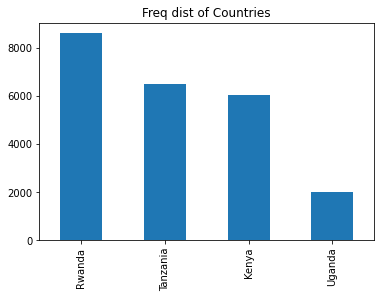

In [33]:
# Frequency plot of country
financial['country'].value_counts().plot.bar(title="Freq dist of Countries")


Rwanda has highest number of respondents

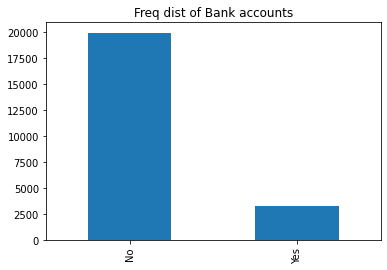

In [34]:
# Frequency plot of Has a Bank account
financial['Has a Bank account'].value_counts().plot.bar(title="Freq dist of Bank accounts")


Higher number of respondents do not have bank accounts

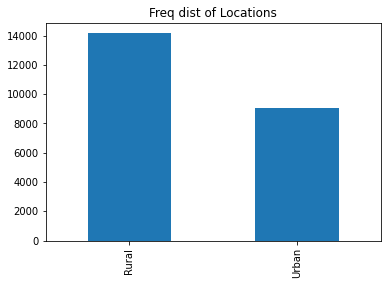

In [35]:
# Frequency plot of location_type
financial['location_type'].value_counts().plot.bar(title="Freq dist of Locations")


Higher number of respondents are from rural areas

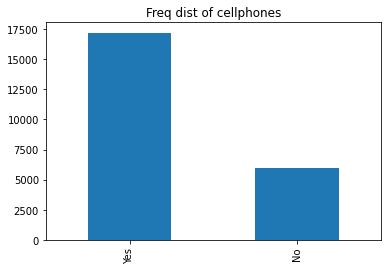

In [36]:
# Frequency plot of cellphone_access
financial['cellphone_access'].value_counts().plot.bar(title="Freq dist of cellphones")


Higher number of respondents have cell phones

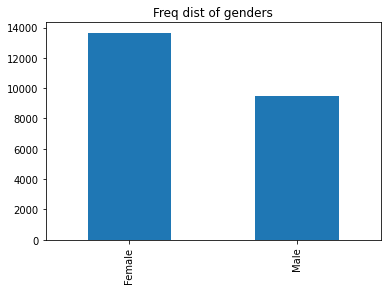

In [37]:
# Frequency plot of gender_of_respondent
financial['gender_of_respondent'].value_counts().plot.bar(title="Freq dist of genders")


More female respondents than male respondents

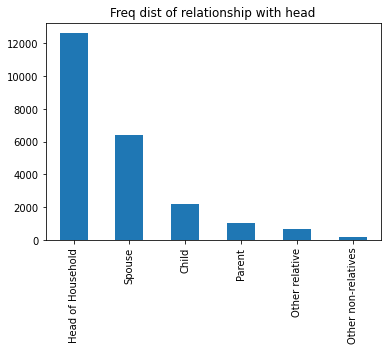

In [38]:
# Frequency plot of relationship_with_head
financial['relationship_with_head'].value_counts().plot.bar(title="Freq dist of relationship with head")


Largest number of respondents are either head of household or spouse to the head of household

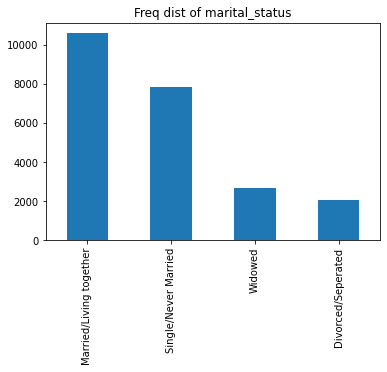

In [39]:
# Frequency plot of marital_status
financial['marital_status'].value_counts().plot.bar(title="Freq dist of marital_status")


Highest number of respondents are either married or living together

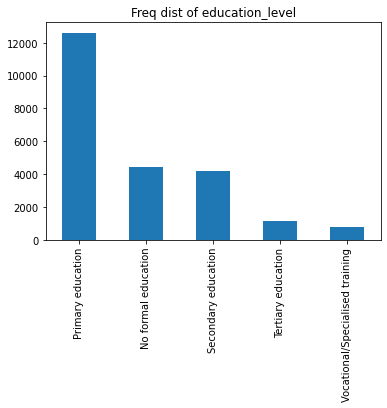

In [40]:
# Frequency plot of education_level
financial['education_level'].value_counts().plot.bar(title="Freq dist of education_level")


Highest number of respondents have primary education

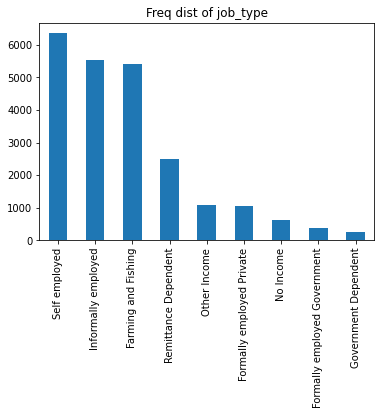

In [41]:
# Frequency plot of job_type
financial['job_type'].value_counts().plot.bar(title="Freq dist of job_type")


Most common job is farming or fishing

### Numerical analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


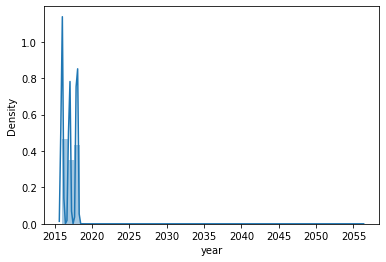

In [42]:
# Histogram of year distribution
sns.distplot(financial['year'])

Most common year of respondents are 2016 and 2018

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


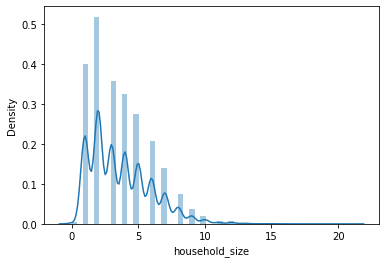

In [43]:
# Histogram of household size
sns.distplot(financial['household_size'])

Most common household size are 2,3 and 4

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


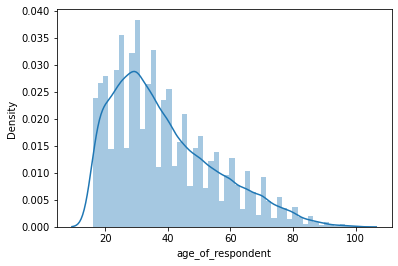

In [44]:
# Histogram of ages of respondents
sns.distplot(financial['age_of_respondent'])

Most of the repsondents are between the ages of 16 - 40

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


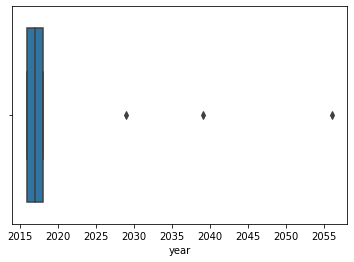

In [45]:
# Outlier detection
# Showing outliers in the years column
sns.boxplot(financial['year'])

In [46]:
# Selecting the outliers 
len(financial.loc[financial['year'] > 2018])

3

In [47]:
# Removing the outliers
financial = financial.drop(index=financial[financial['year'] > 2018].index)

This is because from external analysis the sample collection was between 2016 and 2018

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


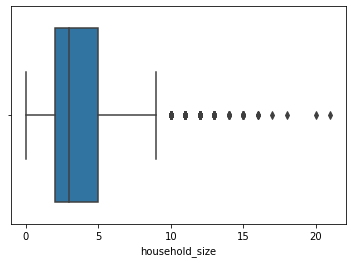

In [48]:
# Show outliers in household size
sns.boxplot(financial['household_size'])

In [49]:
#Selecting outliers the household size column
len(financial.loc[financial['household_size'] == 0])

36

In [50]:
# Removing the outliers
financial = financial.drop(index=financial[financial['household_size'] == 0].index)

This is because there is no household expected with 0 people

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


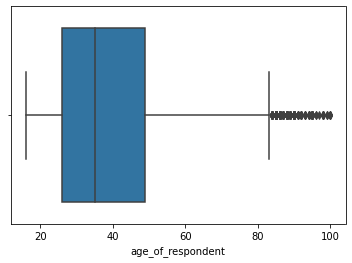

In [51]:
# Show outliers in age
sns.boxplot(financial['age_of_respondent'])

In [52]:
# Summary statistical analysis
financial.describe(include='all')

,country,year,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23136,23136.000000,23136,23136,23136,23136.000000,23136.000000,23136,23136,23136,23136,23136
unique,4,NaN,2,2,2,NaN,NaN,2,6,4,5,9
top,Rwanda,NaN,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8610,NaN,19868,14133,17195,NaN,NaN,13638,12605,10597,12593,6352
mean,NaN,2016.976444,NaN,NaN,NaN,3.690353,38.766987,NaN,NaN,NaN,NaN,NaN
std,NaN,0.848655,NaN,NaN,NaN,2.276060,16.476206,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


## Bivariate analysis

### Pair plots

In [53]:
# Selecting columns to be used in the pair plots
financial_hist = financial.loc[:,['year','household_size','age_of_respondent']]
financial_hist.head()

,year,household_size,age_of_respondent
0,2018,3.0,24.0
1,2018,5.0,70.0
2,2018,5.0,26.0
3,2018,5.0,34.0
4,2018,8.0,26.0


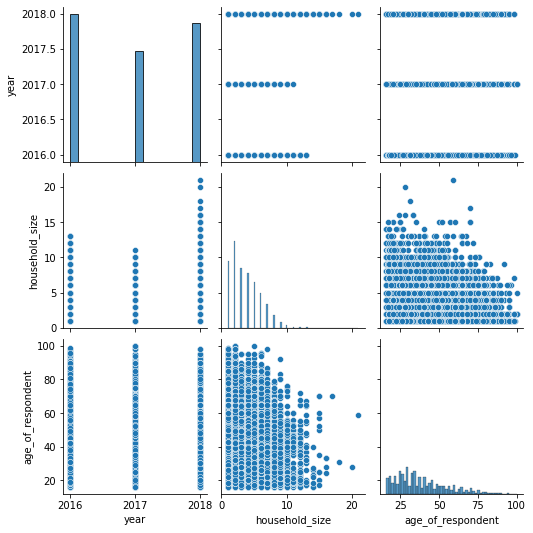

In [54]:
# Creating the pair plots
sns.pairplot(financial_hist)

### Correlation 

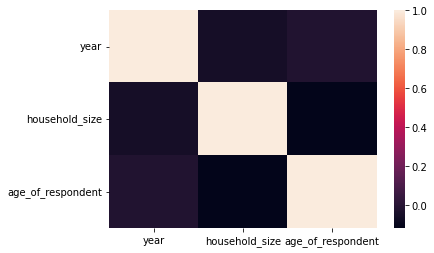

In [55]:
# Creating a correlation plot
corr = financial_hist.corr()
sns.heatmap(corr, xticklabels= financial_hist.columns.values, yticklabels= financial_hist.columns.values)

No correlation between the attributes thus all numerical attributes are important and need to be considered

# Multivariate analysis

In [63]:
#Encode categorical variables to numeric
dummies = pd.get_dummies(financial[['country', 'location_type','cellphone_access','gender_of_respondent',
                                    'relationship_with_head', 'marital_status', 'education_level', 'job_type']])

In [64]:
# Preview dummies
dummies.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_No formal education,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [65]:
# Check shape
dummies.shape

(23136, 34)

In [66]:
# Drop uneccessary columns from dummies to reduce correlation
dummies = dummies.drop(columns=['country_Uganda','location_type_Urban','cellphone_access_Yes','gender_of_respondent_Male',
                                'relationship_with_head_Spouse','marital_status_Widowed','education_level_Tertiary education','job_type_Self employed'])

In [67]:
# Check shape
dummies.shape

(23136, 26)

In [68]:
# Concate financial and dummies dataframes
final = pd.concat([financial,dummies],axis='columns')

In [71]:
# Drop the categorical columns from final
final = final.drop(columns=['country', 'location_type','cellphone_access','gender_of_respondent','relationship_with_head',
                            'marital_status', 'education_level', 'job_type'])

In [72]:
# Preview final
final.head()

,year,Has a Bank account,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,location_type_Rural,cellphone_access_No,gender_of_respondent_Female,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,marital_status_Divorced/Seperated,marital_status_Married/Living together,marital_status_Single/Never Married,education_level_No formal education,education_level_Primary education,education_level_Secondary education,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent
0,2018,Yes,3.0,24.0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2018,No,5.0,70.0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,2018,Yes,5.0,26.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,2018,No,5.0,34.0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,2018,No,8.0,26.0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


In [139]:
# create feature and label datasets
X = final.drop('Has a Bank account', axis='columns')
y = final['Has a Bank account']

In [140]:
# Splitting the datasets into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [141]:
# Scaling the dataset to perform normalisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling and training

In [142]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [104]:
# Calculating explained variance ratio using variations of the principal components
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.17960835e-01, 8.67336955e-02, 8.36433740e-02, 6.10580830e-02,
       5.52903281e-02, 5.08507270e-02, 4.45282603e-02, 4.14525434e-02,
       3.95774177e-02, 3.73815072e-02, 3.56162974e-02, 3.48849071e-02,
       3.39097249e-02, 3.36168292e-02, 3.25826001e-02, 3.01595660e-02,
       2.86187400e-02, 2.65638821e-02, 2.39894944e-02, 2.26452594e-02,
       1.97619136e-02, 1.80181059e-02, 1.53061614e-02, 8.30454901e-03,
       7.64921015e-03, 4.14402589e-03, 3.26699608e-03, 2.48496579e-03,
       1.10548231e-31])

In [95]:
# Using 1 principal component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [96]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [97]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [98]:
# Performance Evaluation of the model
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3970    0]
 [ 658    0]]
Accuracy 0.8578219533275713


Using only one feature, the random forest algorithm is able to predict with an accuracy of 85.782%

# Challenging the solution

In [105]:
# Using two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [106]:
# Training the model
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [107]:
# Performance evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[3951   19]
 [ 597   61]]
Accuracy 0.8668971477960242


Using only two features, the random forest algorithm is able to predict with an accuracy of 86.689%

## Challenging the solution when cumulative variance is around 80%

In [116]:
# Calculate the cumulative sum of PC variance ratio
cumulative = np.cumsum(explained_variance)
cumulative

array([0.11796084, 0.20469453, 0.2883379 , 0.34939599, 0.40468632,
       0.45553704, 0.5000653 , 0.54151785, 0.58109526, 0.61847677,
       0.65409307, 0.68897798, 0.7228877 , 0.75650453, 0.78908713,
       0.8192467 , 0.84786544, 0.87442932, 0.89841881, 0.92106407,
       0.94082599, 0.95884409, 0.97415025, 0.9824548 , 0.99010401,
       0.99424804, 0.99751503, 1.        , 1.        ])

In [121]:
# Using principal components where variance ratio is 81.92%
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [122]:
# Training the model
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [123]:
# Performance evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[3962    8]
 [ 619   39]]
Accuracy 0.8645203111495247


Using 16 features the random forest algorithm is able to predict with an accuracy of 86.452%



## Challenging solution full feature set 

In [143]:
# Using all principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=29)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [144]:
# Training the model
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [145]:
# Performance evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[3958   12]
 [ 625   33]]
Accuracy 0.8623595505617978


Using the full feature set the random forest algorithm is able to predict with an accuracy of 86.235%

# Conclusions

From the above experimentation we achieved a high level of accuracy while significantly reducing the number of features in the dataset. The accuracy of a classifier doesn't necessarily improve with increased number of principal components. From the results we can see that the accuracy achieved with two principal component (86.689%) was greater than the one achieved with 16 principal components (86.452%) and the full set of components ( 86.235%).

In [138]:
# Calculate the cumulative sum of PC variance ratio
cumulative = np.cumsum(explained_variance)
cumulative

array([0.11796084, 0.20469453, 0.2883379 , 0.34939599, 0.40468632,
       0.45553704, 0.5000653 , 0.54151785, 0.58109526, 0.61847677,
       0.65409307, 0.68897798, 0.7228877 , 0.75650453, 0.78908713,
       0.8192467 , 0.84786544, 0.87442932, 0.89841881, 0.92106407,
       0.94082599, 0.95884409, 0.97415025, 0.9824548 , 0.99010401,
       0.99424804, 0.99751503, 1.        , 1.        ])

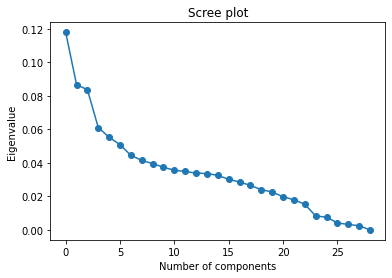

In [147]:
# Plotting scree plot
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')

plt.show()

At least 22 components are required to reach at least 95% of the variance of the original data 
Thus out of 29 components there is scope to reduce dimensionality and this also implies most of the variables do not increase much variance to the data